# 載入套件

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

%matplotlib inline

# 載入 toy example 資料集

In [3]:
toy = datasets.make_blobs(centers=3, n_features=4)
X = toy[0]
y = toy[1]

In [4]:
# 設定 模型 估計參數
estimators = [('k_means_8', KMeans(n_clusters=8)),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

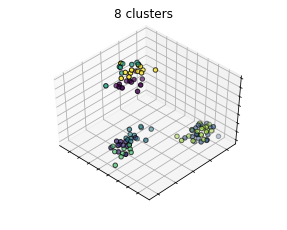

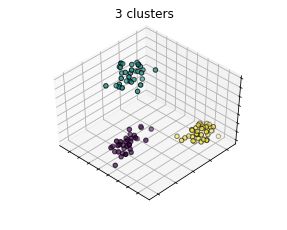

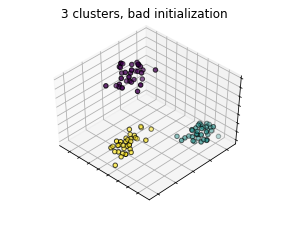

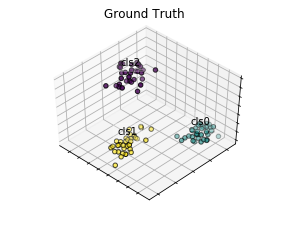

In [5]:
fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

#fig.show()

# 作業
### 用 iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [6]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

In [58]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
%matplotlib inline

In [59]:
params = pd.DataFrame(data = [[3, 'k-means++'],
                              [3, 'random'],
                              [5, 'k-means++'],
                              [5, 'random'],
                              [7, 'k-means++'],
                              [7, 'random']],
                     columns = ['groups','method'])
params

,groups,method
0,3,k-means++
1,3,random
2,5,k-means++
3,5,random
4,7,k-means++
5,7,random


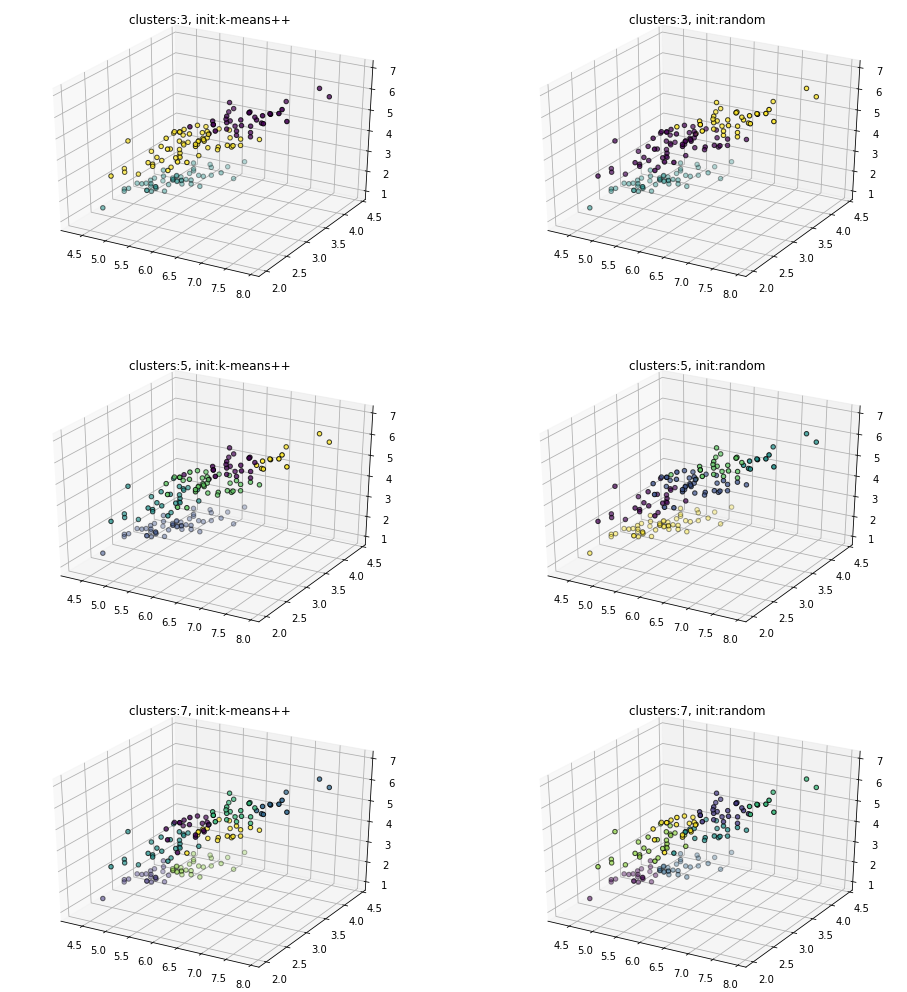

In [63]:
fig = plt.figure(figsize=(16,18))
for i, j, k in zip(list(range(len(params))) ,params.groups, params.method):
    km = KMeans(n_clusters= j, init = k)
    km.fit(X)

    ax = fig.add_subplot(3, 2, i+1, projection='3d')
    ax.scatter(X[:,0], X[:,1], X[:,2], c = km.labels_, edgecolor = 'k')
    ax.set_title('clusters:{}, init:{}'.format(j,k))

Text(0.5, 0.92, 'Original dataset')

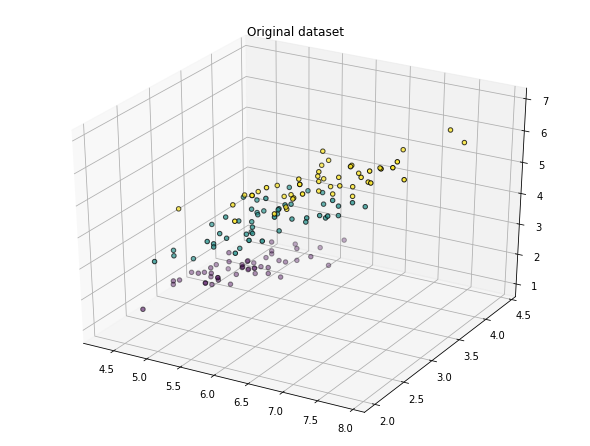

In [66]:
fig = plt.figure(figsize = (8,6))
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], X[:,2], c = y, edgecolor = 'k')
ax.set_title('Original dataset')